**Practica 1**

**Gestión y Gobierno de Datos**

**Alumnos**: Leonardo Ramirez / Daniel Rios

**Api de Noticias**

In [66]:
import requests

api_key = #Se borró el nombre del Api
url = f'https://gnews.io/api/v4/top-headlines?country=pe&category=general&apikey={api_key}'

response = requests.get(url)
data = response.json()

# Convertir a DataFrame
import pandas as pd
df = pd.DataFrame(data['articles'])
print(df.head())


                                               title  \
0  San Martín: eliminan 14 toneladas de criaderos...   
1  Adidas conmemora el 30° aniversario de Toy Sto...   
2  Día Mundial de la Actividad Física: Minsa recu...   
3  Nueva prórroga a TikTok en Estados Unidos: la ...   
4  Las fuertes imágenes del choque de mototaxi qu...   

                                         description  \
0  Últimas noticias de Perú y el mundo sobre polí...   
1  En colaboración con Disney y Pixar, la marca d...   
2  “Es tiempo de moverse”. Este es el lema del 20...   
3  El presidente de Estados Unidos, Donald Trump ...   
4  Mototaxi funcionaba como movilidad escolar y l...   

                                             content  \
0  Esta acción para evitar la proliferación de la...   
1  En colaboración con Disney y Pixar, la marca d...   
2  “Es tiempo de moverse”. Este es el lema del 20...   
3  Donald Trump enfatizó su intención de "salvar"...   
4  Un trágico accidente ocurrió la tarde del p

In [67]:
df.head()

,title,description,content,url,image,publishedAt,source
0,San Martín: eliminan 14 toneladas de criaderos...,Últimas noticias de Perú y el mundo sobre polí...,Esta acción para evitar la proliferación de la...,https://andina.pe/agencia/noticia-san-martin-e...,https://portal.andina.pe/EDPfotografia3/Thumbn...,2025-04-04T22:41:35Z,{'name': 'Agencia Peruana de Noticias | ANDINA...
1,Adidas conmemora el 30° aniversario de Toy Sto...,"En colaboración con Disney y Pixar, la marca d...","En colaboración con Disney y Pixar, la marca d...",https://www.mercadonegro.pe/marketing/adidas-c...,https://static.mercadonegro.pe/wp-content/uplo...,2025-04-04T22:24:45Z,"{'name': 'Mercado Negro', 'url': 'https://www...."
2,Día Mundial de la Actividad Física: Minsa recu...,“Es tiempo de moverse”. Este es el lema del 20...,“Es tiempo de moverse”. Este es el lema del 20...,https://www.gob.pe/institucion/minsa/noticias/...,https://cdn.www.gob.pe/uploads/document/file/7...,2025-04-04T20:48:48Z,"{'name': 'gob.pe', 'url': 'https://www.gob.pe'}"
3,Nueva prórroga a TikTok en Estados Unidos: la ...,"El presidente de Estados Unidos, Donald Trump ...","Donald Trump enfatizó su intención de ""salvar""...",https://www.infobae.com/tecno/2025/04/04/nueva...,https://www.infobae.com/resizer/v2/GJHY46ZPE42...,2025-04-04T20:32:42Z,"{'name': 'Infobae', 'url': 'https://www.infoba..."
4,Las fuertes imágenes del choque de mototaxi qu...,Mototaxi funcionaba como movilidad escolar y l...,Un trágico accidente ocurrió la tarde del pasa...,https://trome.com/actualidad/policiales/mancha...,https://trome.com/resizer/v2/D2RG6XNKDNFMXOFRX...,2025-04-04T18:51:18Z,"{'name': 'Trome.com', 'url': 'https://trome.com'}"


In [68]:
import pandas as pd
import numpy as np
from datetime import datetime

def evaluar_calidad_noticias(df):
    metricas = {}

    # --------------------------
    # 1. Completitud
    completitud = df.notnull().mean()
    for col in df.columns:
        metricas[f"completitud_{col} (%)"] = completitud[col]

    # --------------------------
    # 2. Unicidad
    metricas["duplicados_exactos (%)"] = df.drop(columns=['source']).duplicated().mean()

    metricas["duplicados_titulo (%)"] = df['title'].duplicated().mean()

    # --------------------------
    # 3. Validez
    # Fecha válida
    try:
        df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')
        metricas["fecha_valida (%)"] = df['publishedAt'].notnull().mean()
    except:
        metricas["fecha_valida (%)"] = 0

    # URL válida (simple validación)
    metricas["url_valida (%)"] = df['url'].apply(lambda x: isinstance(x, str) and x.startswith("http")).mean()
    metricas["image_url_valida (%)"] = df['image'].apply(lambda x: isinstance(x, str) and x.startswith("http")).mean()

    # --------------------------
    # 4. Consistencia
    metricas["contenido_distinto_de_descripcion (%)"] = (df["content"] != df["description"]).mean()

    # --------------------------
    # 5. Conformidad
    metricas["source_tipo_diccionario (%)"] = df['source'].apply(lambda x: isinstance(x, dict)).mean()

    # --------------------------
    # 6. Timeliness (actualización)
    # 6. Timeliness (actualización)
    if df['publishedAt'].notnull().any():
        ultima_fecha = df['publishedAt'].max().tz_localize(None)
        hoy = pd.Timestamp.today()
        metricas["dias_desde_ultima_noticia"] = (hoy - ultima_fecha).days
    else:
        metricas["dias_desde_ultima_noticia"] = np.nan


    # --------------------------
    # 7. Precisión del contenido (textos no vacíos)
    metricas["titulo_no_vacio (%)"] = df['title'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 10).mean()
    metricas["contenido_no_vacio (%)"] = df['content'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 30).mean()

    # --------------------------
    # Mostrar métricas
    for k, v in metricas.items():
        print(f"{k}: {round(v * 100, 2) if isinstance(v, float) else v}")

    return metricas

In [69]:
evaluar_calidad_noticias(df)

completitud_title (%): 100.0
completitud_description (%): 100.0
completitud_content (%): 100.0
completitud_url (%): 100.0
completitud_image (%): 100.0
completitud_publishedAt (%): 100.0
completitud_source (%): 100.0
duplicados_exactos (%): 0.0
duplicados_titulo (%): 0.0
fecha_valida (%): 100.0
url_valida (%): 100.0
image_url_valida (%): 100.0
contenido_distinto_de_descripcion (%): 100.0
source_tipo_diccionario (%): 100.0
dias_desde_ultima_noticia: 0
titulo_no_vacio (%): 100.0
contenido_no_vacio (%): 100.0


{'completitud_title (%)': np.float64(1.0),
 'completitud_description (%)': np.float64(1.0),
 'completitud_content (%)': np.float64(1.0),
 'completitud_url (%)': np.float64(1.0),
 'completitud_image (%)': np.float64(1.0),
 'completitud_publishedAt (%)': np.float64(1.0),
 'completitud_source (%)': np.float64(1.0),
 'duplicados_exactos (%)': np.float64(0.0),
 'duplicados_titulo (%)': np.float64(0.0),
 'fecha_valida (%)': np.float64(1.0),
 'url_valida (%)': np.float64(1.0),
 'image_url_valida (%)': np.float64(1.0),
 'contenido_distinto_de_descripcion (%)': np.float64(1.0),
 'source_tipo_diccionario (%)': np.float64(1.0),
 'dias_desde_ultima_noticia': 0,
 'titulo_no_vacio (%)': np.float64(1.0),
 'contenido_no_vacio (%)': np.float64(1.0)}

**Dataset de Temperatura**

In [70]:
import requests
import pandas as pd
from datetime import date

# Lista de ciudades y coordenadas
ciudades = {
    'Lima': (-12.0464, -77.0428),
    'Arequipa': (-16.4090, -71.5375),
    'Cusco': (-13.5319, -71.9675),
    'Piura': (-5.1945, -80.6328),
    'Puno': (-15.8402, -70.0219),
    'Callao': (-12.05659, -77.11814),
    'Tacna': 	(-18.01465, -70.25362)
}

# Fechas de interés
fecha_inicio = '2020-01-01'
fecha_fin = '2024-12-31'

# DataFrame acumulativo
df_total = pd.DataFrame()

# Extracción por ciudad
for ciudad, (lat, lon) in ciudades.items():
    url = (
        f'https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}'
        f'&start_date={fecha_inicio}&end_date={fecha_fin}&daily=temperature_2m_max,temperature_2m_min'
        f'&timezone=America%2FLima'
    )
    response = requests.get(url)
    data = response.json()

    if 'daily' in data:
        df = pd.DataFrame(data['daily'])
        df['ciudad'] = ciudad
        df_total = pd.concat([df_total, df], ignore_index=True)
    else:
        print(f"No se tiene datos sobre la temperatura para la Ciudad de {ciudad}")

print(df_total.head())

         time  temperature_2m_max  temperature_2m_min ciudad
0  2020-01-01                24.8                20.0   Lima
1  2020-01-02                23.6                20.2   Lima
2  2020-01-03                24.0                19.7   Lima
3  2020-01-04                24.5                19.6   Lima
4  2020-01-05                24.5                20.3   Lima


In [71]:
df_total

,time,temperature_2m_max,temperature_2m_min,ciudad
0,2020-01-01,24.8,20.0,Lima
1,2020-01-02,23.6,20.2,Lima
2,2020-01-03,24.0,19.7,Lima
3,2020-01-04,24.5,19.6,Lima
4,2020-01-05,24.5,20.3,Lima
...,...,...,...,...
12784,2024-12-27,23.8,14.7,Tacna
12785,2024-12-28,24.5,14.4,Tacna
12786,2024-12-29,24.8,15.2,Tacna
12787,2024-12-30,24.7,15.2,Tacna


In [72]:
# 1. Completitud
print("\n📌 Completitud (nulos):")
faltantes = df_total.isnull().sum()
print(faltantes)

# 2. Exactitud (rango razonable de temperatura)
print("\n📌 Exactitud:")
fuera_de_rango = df_total[
    (df_total['temperature_2m_max'] > 60) |
    (df_total['temperature_2m_max'] < -30) |
    (df_total['temperature_2m_min'] > 60) |
    (df_total['temperature_2m_min'] < -30)
]
print(f"Registros fuera de rango: {len(fuera_de_rango)}")

# 3. Consistencia
print("\n📌 Consistencia:")
inconsistencias = df_total[df_total['temperature_2m_min'] > df_total['temperature_2m_max']]
print(f"Registros con inconsistencia temperatura min > max: {len(inconsistencias)}")

# 4. Unicidad
print("\n📌 Unicidad:")
duplicados = df_total.duplicated(subset=['time', 'ciudad'])
print(f"Registros duplicados (fecha + ciudad): {duplicados.sum()}")

# 5. Actualización (ver si la última fecha está presente)
print("\n📌 Actualización:")
if fecha_fin in df_total['time'].values:
    print("✅ Última fecha está presente.")
else:
    print("❌ Faltan registros recientes.")

# 6. Validez
print("\n📌 Validez:")
tipos = df_total.dtypes
print(tipos)


📌 Completitud (nulos):
time                  0
temperature_2m_max    0
temperature_2m_min    0
ciudad                0
dtype: int64

📌 Exactitud:
Registros fuera de rango: 0

📌 Consistencia:
Registros con inconsistencia temperatura min > max: 0

📌 Unicidad:
Registros duplicados (fecha + ciudad): 0

📌 Actualización:
✅ Última fecha está presente.

📌 Validez:
time                   object
temperature_2m_max    float64
temperature_2m_min    float64
ciudad                 object
dtype: object


**Dataset de Tipo de Cambio**

In [73]:
serie = #"PD04640PD" #Se dejo en texto para subirlo
estructura = f#"https://estadisticas.bcrp.gob.pe/estadisticas/series/api/{serie}/json" "se dejo en texto para subirlo"

data = requests.get(estructura).json()

In [74]:
## Convertir a dataframe
df = pd.DataFrame(data["periods"])
df["values"] = df["values"].apply(lambda x: x[0])
df.head()

,name,values
0,21.Feb.25,3.683
1,24.Feb.25,3.689
2,25.Feb.25,3.686
3,26.Feb.25,3.681
4,27.Feb.25,3.674


In [75]:
# Diccionario para traducir meses
meses = {
    'Ene': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr',
    'May': 'May', 'Jun': 'Jun', 'Jul': 'Jul', 'Ago': 'Aug',
    'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dic': 'Dec'
}

# Reemplazar en la columna
df['name'] = df['name'].replace(meses, regex=True)

# Convertir a datetime
df['name'] = pd.to_datetime(df['name'], format='%d.%b.%y')
df.head()


,name,values
0,2025-02-21,3.683
1,2025-02-24,3.689
2,2025-02-25,3.686
3,2025-02-26,3.681
4,2025-02-27,3.674


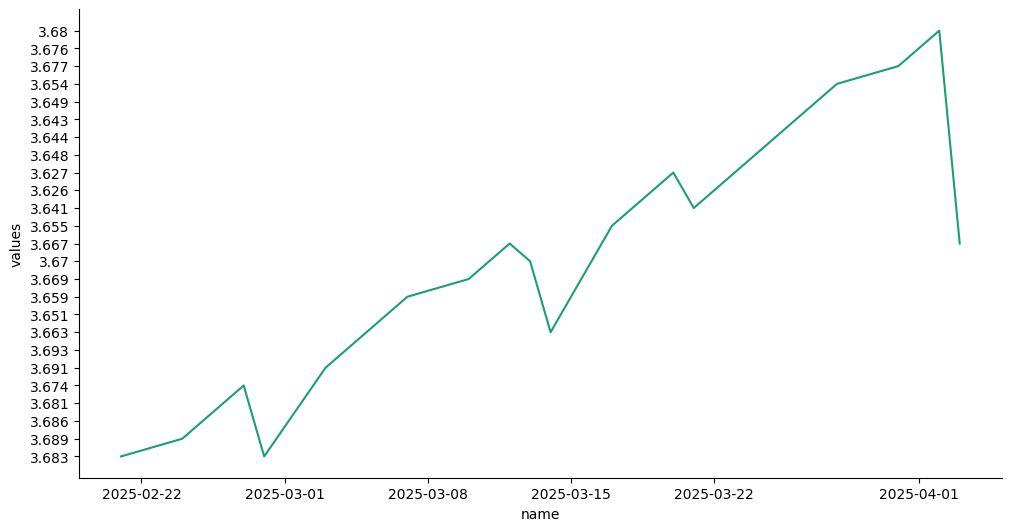

In [76]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['name']
  ys = series['values']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('name', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('name')
_ = plt.ylabel('values')

In [77]:
def calcular_metricas_calidad(df):
    metricas = {}

    # Asegurarse de que 'values' sea numérica
    df["values"] = pd.to_numeric(df["values"], errors="coerce")

    # Completitud: % de valores no nulos
    completitud = df["values"].notnull().mean()
    metricas["completitud"] = completitud

    # Duplicados: % de filas duplicadas
    duplicados = df.duplicated().mean()
    metricas["duplicados (%)"] = duplicados

    # Valores nulos: % de nulos en 'values'
    nulos = df["values"].isnull().mean()
    metricas["valores_nulos (%)"] = nulos

    # Validez: valores numéricos y positivos
    tasas_validas = df["values"].apply(lambda x: x > 0 if pd.notnull(x) else False).mean()
    metricas["validez (%)"] = tasas_validas

    # Consistencia: fechas ordenadas y únicas
    try:
        df["name"] = pd.to_datetime(df["name"], errors="coerce")
        fechas_ordenadas = df["name"].is_monotonic_increasing
        fechas_unicas = df["name"].is_unique
    except:
        fechas_ordenadas = False
        fechas_unicas = False
    metricas["fechas_ordenadas"] = fechas_ordenadas
    metricas["fechas_unicas"] = fechas_unicas

    # Precisión: ¿tienen exactamente 3 decimales?
    precision = df["values"].dropna().apply(lambda x: len(str(x).split('.')[-1]) == 3).mean()
    metricas["precision_3_decimales (%)"] = precision

    # Timeliness: ¿última fecha registrada qué tan reciente es?
    if df["name"].notnull().any():
        dias_desde_ultima_fecha = (pd.Timestamp.today() - df["name"].max()).days
    else:
        dias_desde_ultima_fecha = np.nan
    metricas["dias_desde_ultima_fecha"] = dias_desde_ultima_fecha

    # Conformidad: formato de fecha válido
    formatos_validos = df["name"].notnull().mean()
    metricas["formato_fecha_valido (%)"] = formatos_validos

    # Imprimir todo
    for k, v in metricas.items():
        print(f"{k}: {v}")

    return metricas

In [49]:
calcular_metricas_calidad(df)

completitud: 1.0
duplicados (%): 0.0
valores_nulos (%): 0.0
validez (%): 1.0
fechas_ordenadas: True
fechas_unicas: True
precision_3_decimales (%): 0.9
dias_desde_ultima_fecha: 1
formato_fecha_valido (%): 1.0


{'completitud': np.float64(1.0),
 'duplicados (%)': np.float64(0.0),
 'valores_nulos (%)': np.float64(0.0),
 'validez (%)': np.float64(1.0),
 'fechas_ordenadas': True,
 'fechas_unicas': True,
 'precision_3_decimales (%)': np.float64(0.9),
 'dias_desde_ultima_fecha': 1,
 'formato_fecha_valido (%)': np.float64(1.0)}

**Proceso de extracción de datos**

El código que realiza la extracción de datos públicos para Noticias, Temperatura y Tipo de Cambio.

**Noticias**: Se utiliza la API de GNews para obtener
nnoticias relevantes de Perú.
**Temperatura**: Se utiliza la API de Open-Meteo para extraer datos de temperatura de varias ciudades de Perú.
**Tipo de Cambio**: Se utiliza la API del BCRP para extraer datos históricos del tipo de cambio.

Justificación de la elección del indicador de calidad

Es importante justificar por qué cada indicador de calidad es relevante para el proyecto:

**Completitud:** La falta de datos puede afectar la precisión del forecast de demanda.
**Precisión y exactitud:** Datos erróneos o inexactos pueden llevar a conclusiones incorrectas y afectar las decisiones de precios.
**Actualización:** Datos desactualizados no reflejan la situación actual del mercado y pueden resultar en estrategias de precios ineficaces.
**Consistencia:** Las inconsistencias en los datos pueden generar errores en el análisis y afectar la confiabilidad de los resultados.
**Validez**: Es crucial que los datos sean del tipo correcto y estén dentro de rangos válidos para que el análisis sea significativo.
